# Business Problem:

- Recently after proving its mettle in sales and marketing, machine learning is also becoming central to employee-related decisions within HR management. 
- Organizational growth largely depends on staff retention. 
- Losing employees frequently impacts the morale of the organization and hiring new employees is more expensive than retaining existing ones. 
- The worker quality and skills represent a growth factor and a real competitive advantage for companies.



- Recruiting and retaining employees is seen by industry watchers as a tough battle for the transportation company. 
- Churn among employees is high and it’s very easy for employees to stop working for the service on the fly or jump to another company depending on the rates.
- As the companies get bigger, the high churn could become a bigger problem. To find new employees, Transportation company is casting a wide net, including people who don’t have cars for jobs. 
- But this acquisition is really costly. Losing employees frequently impacts the morale of the organization and acquiring new employees is more expensive than retaining existing ones.



- As a data scientist with the Analytics Department of a the transportation company, focused on employee team attrition, we are provided with the monthly information for a segment of employees for 2019 and 2020 and tasked to predict whether a employee will be leaving the company or not based on their attributes like:

    - Demographics (city, age, gender etc.)
    - Tenure information (joining date, Last Date)
    - Historical data regarding the performance of the employee (Quarterly rating, Monthly business acquired, Designation, Salary)

### Column Profiling:

- MMMM-YY : Reporting Date (Monthly)
- Driver_ID : Unique id for drivers
- Age : Age of the driver
- Gender : Gender of the driver – Male : 0, Female: 1
- City : City Code of the driver
- Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
- Income : Monthly average Income of the driver
- Date Of Joining : Joining date for the driver
- LastWorkingDate : Last date of working for the driver
- Joining Designation : Designation of the driver at the time of joining
- Grade : Grade of the driver at the time of reporting
- Total Business Value : The total business value acquired by the driver in a month (negative business indicates - cancellation/refund or car EMI adjustments)
- Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)

## Importing required packages:

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style='whitegrid')
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
 accuracy_score, confusion_matrix, classification_report,
 roc_auc_score, roc_curve, auc,
 plot_confusion_matrix, plot_roc_curve
)


In [2]:
# Loading data into Dataframe

ola_data = pd.read_csv("ola_driver_scaler.txt")
ola_data

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2


Inference:

- We have 19104 data points, and 13 features.

### Variables and data types:

In [3]:
ola_data.shape

(19104, 14)

In [4]:
ola_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [5]:
def features(df):
    
    print(f"Columns with category datatypes (Categorical Features) are : \
    {list(df.select_dtypes('object').columns)}")
    print('-'*125)
    print('-'*125)
    print(f"Columns with integer and float datatypes (Numerical Features) are: \
    {list(df.select_dtypes(['int64','float64']).columns)}")

In [6]:
features(ola_data)

Columns with category datatypes (Categorical Features) are :     ['MMM-YY', 'City', 'Dateofjoining', 'LastWorkingDate']
-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Columns with integer and float datatypes (Numerical Features) are:     ['Unnamed: 0', 'Driver_ID', 'Age', 'Gender', 'Education_Level', 'Income', 'Joining Designation', 'Grade', 'Total Business Value', 'Quarterly Rating']


### Basic metrics:

In [7]:
ola_data.describe(include=[np.number]).transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,19104.0,9551.500000,5.514994e+03,0.0,4775.75,9551.5,14327.25,19103.0
Driver_ID,19104.0,1415.591133,8.107053e+02,1.0,710.00,1417.0,2137.00,2788.0
Age,19043.0,34.668435,6.257912e+00,21.0,30.00,34.0,39.00,58.0
Gender,19052.0,0.418749,4.933670e-01,0.0,0.00,0.0,1.00,1.0
Education_Level,19104.0,1.021671,8.001671e-01,0.0,0.00,1.0,2.00,2.0
Income,19104.0,65652.025126,3.091452e+04,10747.0,42383.00,60087.0,83969.00,188418.0
Joining Designation,19104.0,1.690536,8.369837e-01,1.0,1.00,1.0,2.00,5.0
Grade,19104.0,2.252670,1.026512e+00,1.0,1.00,2.0,3.00,5.0
Total Business Value,19104.0,571662.074958,1.128312e+06,-6000000.0,0.00,250000.0,699700.00,33747720.0
Quarterly Rating,19104.0,2.008899,1.009832e+00,1.0,1.00,2.0,3.00,4.0


In [8]:
ola_data.describe(include=[object]).transpose()

,count,unique,top,freq
MMM-YY,19104,24,01/01/19,1022
City,19104,29,C20,1008
Dateofjoining,19104,869,23/07/15,192
LastWorkingDate,1616,493,29/07/20,70


In [9]:
# Missing values:

def missingValue(df):
    #Identifying Missing data.
    total_null = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/len(df))*100).sort_values(ascending = False)
    print(f"Total records in our data =  {df.shape[0]} where missing values are as follows:")

    missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
    return missing_data

In [10]:
missing = missingValue(ola_data)
missing[missing['Total Missing'] > 0]

Total records in our data =  19104 where missing values are as follows:


,Total Missing,In Percent
LastWorkingDate,17488,91.54
Age,61,0.32
Gender,52,0.27


### Inference

- For Age and Gender Columns we will fill missing values later.
- 91.54 % data for LastWorkingDate is missing. 
- The missing percentage is high, it's not because of Null values but the employees are not planning to leave the company and hence have not provided the info.Therefore we will not remove this feature from our data, instead we will treat this as our target variable.

## Feature Engineering

In [11]:
# Creating a copy of original data before proceeding further:
ola_data_copy = ola_data.copy()

In [12]:
ola_data['Driver_ID'].unique()

array([   1,    2,    4, ..., 2786, 2787, 2788], dtype=int64)

In [13]:
ola_data['Driver_ID'].nunique()

2381

In [14]:
#Creating a column (quarterly_performance) which tells whether the quarterly rating has increased for that employee
#for those whose quarterly rating has increased we assign the value 1

temp_rating = ola_data[['Driver_ID','Quarterly Rating']].groupby('Driver_ID').first().reset_index()


In [15]:
temp_rating['Quarterly_Rating_first'] = temp_rating['Quarterly Rating']
temp_rating['Quarterly_Rating_last'] =  ola_data[['Driver_ID','Quarterly Rating']].groupby('Driver_ID').last().reset_index()['Quarterly Rating']
temp_rating['quarterly_performance'] = np.where(temp_rating['Quarterly_Rating_last'] - temp_rating['Quarterly_Rating_first'] > 0, 1,0)

temp_rating

,Driver_ID,Quarterly Rating,Quarterly_Rating_first,Quarterly_Rating_last,quarterly_performance
0,1,2,2,2,0
1,2,1,1,1,0
2,4,1,1,1,0
3,5,1,1,1,0
4,6,1,1,2,1
...,...,...,...,...,...
2376,2784,3,3,4,1
2377,2785,1,1,1,0
2378,2786,2,2,1,0
2379,2787,2,2,1,0


In [16]:
temp_rating.drop(['Quarterly Rating','Quarterly_Rating_first','Quarterly_Rating_last'], axis= 1, inplace = True)
temp_rating

,Driver_ID,quarterly_performance
0,1,0
1,2,0
2,4,0
3,5,0
4,6,1
...,...,...
2376,2784,1
2377,2785,0
2378,2786,0
2379,2787,0


In [17]:
#Creating a column (Salary_increment) which tells whether the monthly Salary has increased for that employee

#for those whose monthly Salary has increased we assign the value 1

In [18]:
temp_Salary = ola_data[['Driver_ID','Income']].groupby('Driver_ID').first().reset_index()
temp_Salary['last'] = ola_data[['Driver_ID','Income']].groupby('Driver_ID').last().reset_index()['Income']
temp_Salary['Salary_increment'] = np.where(temp_Salary['last'] - temp_Salary['Income'] > 0, 1,0)

temp_Salary

,Driver_ID,Income,last,Salary_increment
0,1,57387,57387,0
1,2,67016,67016,0
2,4,65603,65603,0
3,5,46368,46368,0
4,6,78728,78728,0
...,...,...,...,...
2376,2784,82815,82815,0
2377,2785,12105,12105,0
2378,2786,35370,35370,0
2379,2787,69498,69498,0


In [19]:
temp_Salary.drop(['Income','last'], axis= 1, inplace = True)
temp_Salary

,Driver_ID,Salary_increment
0,1,0
1,2,0
2,4,0
3,5,0
4,6,0
...,...,...
2376,2784,0
2377,2785,0
2378,2786,0
2379,2787,0


### Missing values fill along with feature engineering columns

In [20]:
# Creating a dictionary named "Driver_ID_dict" so that we can apply the aggregate function on the new dataset 
# with feature engineered columns and discarding old columns and columns with  Unknown field

Driver_ID_dict = {
    'MMM-YY' :'first',
    'Driver_ID' :'first',
    'Age' :'last',
    'City' : 'first',
    'Gender' :'first',
    'Education_Level' :'first',
    'Income':'first',
    'Dateofjoining' :'first',
    'LastWorkingDate' : 'last',
    'Joining Designation' :'first',
    'Grade' :'first',
    'Quarterly Rating' :'mean',
    'Total Business Value' :'sum'   
}

In [21]:
Driver_ID_dict_df=ola_data.groupby('Driver_ID').agg(Driver_ID_dict).reset_index(drop = True)
Driver_ID_dict_df

,MMM-YY,Driver_ID,Age,City,Gender,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Quarterly Rating,Total Business Value
0,01/01/19,1,28.0,C23,0.0,2,57387,24/12/18,03/11/19,1,1,2.000000,1715580
1,11/01/20,2,31.0,C7,0.0,2,67016,11/06/20,None,2,2,1.000000,0
2,12/01/19,4,43.0,C13,0.0,2,65603,12/07/19,27/04/20,2,2,1.000000,350000
3,01/01/19,5,29.0,C9,0.0,0,46368,01/09/19,03/07/19,1,1,1.000000,120360
4,08/01/20,6,31.0,C11,1.0,1,78728,31/07/20,None,3,3,1.600000,1265000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,01/01/19,2784,34.0,C24,0.0,0,82815,15/10/15,None,2,3,2.625000,21748820
2377,08/01/20,2785,34.0,C9,1.0,0,12105,28/08/20,28/10/20,1,1,1.000000,0
2378,01/01/19,2786,45.0,C19,0.0,0,35370,31/07/18,22/09/19,2,2,1.666667,2815090
2379,01/01/19,2787,28.0,C20,1.0,2,69498,21/07/18,20/06/19,1,1,1.500000,977830


In [22]:
# Checking if we have not dropped some of the data from target feature mistankenly:

Driver_ID_dict_df['LastWorkingDate'].nunique() == ola_data['LastWorkingDate'].nunique()

True

In [23]:
unique_employee_array = Driver_ID_dict_df['Driver_ID'].unique()
unique_employee_array

array([   1,    2,    4, ..., 2786, 2787, 2788], dtype=int64)

In [24]:
cnt = 0
Emp_IDs_not_present = []
for i in range(1,2789):
    if i not in unique_employee_array:
        Emp_IDs_not_present.append(i)
        cnt+=1
print(cnt)

407


In [25]:
unique_employee_array_org = ola_data['Driver_ID'].unique()
unique_employee_array_org

array([   1,    2,    4, ..., 2786, 2787, 2788], dtype=int64)

In [26]:
cnt = 0
Emp_IDs_not_present_org = []
for i in range(1,2789):
    if i not in unique_employee_array_org:
        Emp_IDs_not_present.append(i)
        cnt+=1
print(cnt)

407


In [27]:
# To cross verify if we are getting all the same Emp_IDs before and after the feature engineering aggregation step.

#Emp_IDs_not_present == Emp_IDs_not_present_org

In [28]:
Driver_ID_dict_df.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'City', 'Gender', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Quarterly Rating', 'Total Business Value'],
      dtype='object')

In [29]:
missing_df_new=missingValue(Driver_ID_dict_df)
missing_df_new[missing_df_new['Total Missing'] > 0]

Total records in our data =  2381 where missing values are as follows:


,Total Missing,In Percent
LastWorkingDate,765,32.13


### Target variable creation:

### Creating a column (target) which tells whether the employee has left the company.

- for employee whose last working day is present will have the value 1.
- aggregate on last value of age for a particular drive is assumed to be at the end of 2020
- mean aggregation is used on Quarterly Rating
- sum aggregation is used on Total Business Value
- aggregatiing on first value for all other features.

In [30]:
# Target variable creation

Driver_ID_dict_df['target'] = Driver_ID_dict_df['LastWorkingDate'].apply(lambda x: 0 if x == None else 1)
Driver_ID_dict_df

,MMM-YY,Driver_ID,Age,City,Gender,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Quarterly Rating,Total Business Value,target
0,01/01/19,1,28.0,C23,0.0,2,57387,24/12/18,03/11/19,1,1,2.000000,1715580,1
1,11/01/20,2,31.0,C7,0.0,2,67016,11/06/20,None,2,2,1.000000,0,0
2,12/01/19,4,43.0,C13,0.0,2,65603,12/07/19,27/04/20,2,2,1.000000,350000,1
3,01/01/19,5,29.0,C9,0.0,0,46368,01/09/19,03/07/19,1,1,1.000000,120360,1
4,08/01/20,6,31.0,C11,1.0,1,78728,31/07/20,None,3,3,1.600000,1265000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,01/01/19,2784,34.0,C24,0.0,0,82815,15/10/15,None,2,3,2.625000,21748820,0
2377,08/01/20,2785,34.0,C9,1.0,0,12105,28/08/20,28/10/20,1,1,1.000000,0,1
2378,01/01/19,2786,45.0,C19,0.0,0,35370,31/07/18,22/09/19,2,2,1.666667,2815090,1
2379,01/01/19,2787,28.0,C20,1.0,2,69498,21/07/18,20/06/19,1,1,1.500000,977830,1


In [31]:
#Merging dataframes:
#Merging temp_rating and temp_Salary into Emp_ID_dict_df and creating final 
#dataframe for further analysis.
company_df_1 =pd.merge(Driver_ID_dict_df,temp_rating ,how='inner', on = 'Driver_ID')
company_data_final =pd.merge(company_df_1,temp_Salary ,how='inner', on = 'Driver_ID')
company_data_final 

,MMM-YY,Driver_ID,Age,City,Gender,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Quarterly Rating,Total Business Value,target,quarterly_performance,Salary_increment
0,01/01/19,1,28.0,C23,0.0,2,57387,24/12/18,03/11/19,1,1,2.000000,1715580,1,0,0
1,11/01/20,2,31.0,C7,0.0,2,67016,11/06/20,None,2,2,1.000000,0,0,0,0
2,12/01/19,4,43.0,C13,0.0,2,65603,12/07/19,27/04/20,2,2,1.000000,350000,1,0,0
3,01/01/19,5,29.0,C9,0.0,0,46368,01/09/19,03/07/19,1,1,1.000000,120360,1,0,0
4,08/01/20,6,31.0,C11,1.0,1,78728,31/07/20,None,3,3,1.600000,1265000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,01/01/19,2784,34.0,C24,0.0,0,82815,15/10/15,None,2,3,2.625000,21748820,0,1,0
2377,08/01/20,2785,34.0,C9,1.0,0,12105,28/08/20,28/10/20,1,1,1.000000,0,1,0,0
2378,01/01/19,2786,45.0,C19,0.0,0,35370,31/07/18,22/09/19,2,2,1.666667,2815090,1,0,0
2379,01/01/19,2787,28.0,C20,1.0,2,69498,21/07/18,20/06/19,1,1,1.500000,977830,1,0,0


## Exploratory Data Analysis:

In [32]:
company_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MMM-YY                 2381 non-null   object 
 1   Driver_ID              2381 non-null   int64  
 2   Age                    2381 non-null   float64
 3   City                   2381 non-null   object 
 4   Gender                 2381 non-null   float64
 5   Education_Level        2381 non-null   int64  
 6   Income                 2381 non-null   int64  
 7   Dateofjoining          2381 non-null   object 
 8   LastWorkingDate        1616 non-null   object 
 9   Joining Designation    2381 non-null   int64  
 10  Grade                  2381 non-null   int64  
 11  Quarterly Rating       2381 non-null   float64
 12  Total Business Value   2381 non-null   int64  
 13  target                 2381 non-null   int64  
 14  quarterly_performance  2381 non-null   int32  
 15  Sala

In [33]:
features(company_data_final)

Columns with category datatypes (Categorical Features) are :     ['MMM-YY', 'City', 'Dateofjoining', 'LastWorkingDate']
-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Columns with integer and float datatypes (Numerical Features) are:     ['Driver_ID', 'Age', 'Gender', 'Education_Level', 'Income', 'Joining Designation', 'Grade', 'Quarterly Rating', 'Total Business Value', 'target']


### Analysing MM-YY

In [34]:


company_data_final['MMM-YY'].nunique()

24

In [35]:
# Coverting to To datetime:

company_data_final['MMM-YY']=pd.to_datetime(company_data_final['MMM-YY'])
company_data_final['MMM-YY'].value_counts()

2019-01-01    1022
2019-11-01     104
2020-07-01     100
2020-08-01      94
2019-07-01      86
2020-05-01      83
2019-12-01      80
2020-12-01      78
2020-06-01      73
2020-04-01      71
2020-10-01      70
2020-09-01      66
2019-10-01      65
2019-06-01      58
2020-01-01      56
2019-09-01      55
2019-08-01      55
2020-11-01      49
2020-02-01      49
2020-03-01      36
2019-05-01      17
2019-04-01       7
2019-02-01       6
2019-03-01       1
Name: MMM-YY, dtype: int64

In [36]:
company_data_2 = company_data_final.copy()

company_data_2['reporting_year'] = company_data_2['MMM-YY'].dt.year
#2
company_data_2['reporting_month'] = company_data_2['MMM-YY'].dt.month
#3
company_data_2['reporting_day_of_week'] = company_data_2['MMM-YY'].dt.day_of_week

In [37]:
company_data_2

,MMM-YY,Driver_ID,Age,City,Gender,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Quarterly Rating,Total Business Value,target,quarterly_performance,Salary_increment,reporting_year,reporting_month,reporting_day_of_week
0,2019-01-01,1,28.0,C23,0.0,2,57387,24/12/18,03/11/19,1,1,2.000000,1715580,1,0,0,2019,1,1
1,2020-11-01,2,31.0,C7,0.0,2,67016,11/06/20,None,2,2,1.000000,0,0,0,0,2020,11,6
2,2019-12-01,4,43.0,C13,0.0,2,65603,12/07/19,27/04/20,2,2,1.000000,350000,1,0,0,2019,12,6
3,2019-01-01,5,29.0,C9,0.0,0,46368,01/09/19,03/07/19,1,1,1.000000,120360,1,0,0,2019,1,1
4,2020-08-01,6,31.0,C11,1.0,1,78728,31/07/20,None,3,3,1.600000,1265000,0,1,0,2020,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2019-01-01,2784,34.0,C24,0.0,0,82815,15/10/15,None,2,3,2.625000,21748820,0,1,0,2019,1,1
2377,2020-08-01,2785,34.0,C9,1.0,0,12105,28/08/20,28/10/20,1,1,1.000000,0,1,0,0,2020,8,5
2378,2019-01-01,2786,45.0,C19,0.0,0,35370,31/07/18,22/09/19,2,2,1.666667,2815090,1,0,0,2019,1,1
2379,2019-01-01,2787,28.0,C20,1.0,2,69498,21/07/18,20/06/19,1,1,1.500000,977830,1,0,0,2019,1,1


In [38]:
company_data_2['reporting_year'].value_counts()

2019    1556
2020     825
Name: reporting_year, dtype: int64

In [39]:
company_data_2['reporting_month'].value_counts()

1     1078
7      186
12     158
11     153
8      149
10     135
6      131
9      121
5      100
4       78
2       55
3       37
Name: reporting_month, dtype: int64

### Analysing Date of joining

In [40]:
company_data_final['Dateofjoining'].nunique()

869

In [41]:
# Coverting company_data_final to datetime:

company_data_final['Dateofjoining']=pd.to_datetime(company_data_final['Dateofjoining'])
company_data_final['Dateofjoining'].value_counts()

2020-07-31    31
2020-09-28    30
2020-05-29    20
2019-10-31    18
2020-05-01    17
              ..
2013-10-21     1
2020-08-17     1
2018-01-26     1
2013-06-02     1
2020-08-28     1
Name: Dateofjoining, Length: 869, dtype: int64

In [42]:
# Coverting company_data_2 to datetime:

company_data_2['Dateofjoining']=pd.to_datetime(company_data_2['Dateofjoining'])
company_data_2

,MMM-YY,Driver_ID,Age,City,Gender,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Quarterly Rating,Total Business Value,target,quarterly_performance,Salary_increment,reporting_year,reporting_month,reporting_day_of_week
0,2019-01-01,1,28.0,C23,0.0,2,57387,2018-12-24,03/11/19,1,1,2.000000,1715580,1,0,0,2019,1,1
1,2020-11-01,2,31.0,C7,0.0,2,67016,2020-11-06,None,2,2,1.000000,0,0,0,0,2020,11,6
2,2019-12-01,4,43.0,C13,0.0,2,65603,2019-12-07,27/04/20,2,2,1.000000,350000,1,0,0,2019,12,6
3,2019-01-01,5,29.0,C9,0.0,0,46368,2019-01-09,03/07/19,1,1,1.000000,120360,1,0,0,2019,1,1
4,2020-08-01,6,31.0,C11,1.0,1,78728,2020-07-31,None,3,3,1.600000,1265000,0,1,0,2020,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2019-01-01,2784,34.0,C24,0.0,0,82815,2015-10-15,None,2,3,2.625000,21748820,0,1,0,2019,1,1
2377,2020-08-01,2785,34.0,C9,1.0,0,12105,2020-08-28,28/10/20,1,1,1.000000,0,1,0,0,2020,8,5
2378,2019-01-01,2786,45.0,C19,0.0,0,35370,2018-07-31,22/09/19,2,2,1.666667,2815090,1,0,0,2019,1,1
2379,2019-01-01,2787,28.0,C20,1.0,2,69498,2018-07-21,20/06/19,1,1,1.500000,977830,1,0,0,2019,1,1


In [43]:
company_data_2 = company_data_final.copy()

#1
company_data_2['joining_year'] = company_data_2['Dateofjoining'].dt.year
#2
company_data_2['joining_month'] = company_data_2['Dateofjoining'].dt.month
#3
company_data_2['joining_day_of_week'] = company_data_2['Dateofjoining'].dt.day_of_week
company_data_2

,MMM-YY,Driver_ID,Age,City,Gender,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Quarterly Rating,Total Business Value,target,quarterly_performance,Salary_increment,joining_year,joining_month,joining_day_of_week
0,2019-01-01,1,28.0,C23,0.0,2,57387,2018-12-24,03/11/19,1,1,2.000000,1715580,1,0,0,2018,12,0
1,2020-11-01,2,31.0,C7,0.0,2,67016,2020-11-06,None,2,2,1.000000,0,0,0,0,2020,11,4
2,2019-12-01,4,43.0,C13,0.0,2,65603,2019-12-07,27/04/20,2,2,1.000000,350000,1,0,0,2019,12,5
3,2019-01-01,5,29.0,C9,0.0,0,46368,2019-01-09,03/07/19,1,1,1.000000,120360,1,0,0,2019,1,2
4,2020-08-01,6,31.0,C11,1.0,1,78728,2020-07-31,None,3,3,1.600000,1265000,0,1,0,2020,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2019-01-01,2784,34.0,C24,0.0,0,82815,2015-10-15,None,2,3,2.625000,21748820,0,1,0,2015,10,3
2377,2020-08-01,2785,34.0,C9,1.0,0,12105,2020-08-28,28/10/20,1,1,1.000000,0,1,0,0,2020,8,4
2378,2019-01-01,2786,45.0,C19,0.0,0,35370,2018-07-31,22/09/19,2,2,1.666667,2815090,1,0,0,2018,7,1
2379,2019-01-01,2787,28.0,C20,1.0,2,69498,2018-07-21,20/06/19,1,1,1.500000,977830,1,0,0,2018,7,5


### Analysing Last Working Date

In [44]:
company_data_final['LastWorkingDate'].nunique()

493

In [45]:
# Coverting company_data_final to datetime:

company_data_final['LastWorkingDate']=pd.to_datetime(company_data_final['LastWorkingDate'])
company_data_final['LastWorkingDate'].value_counts()

2020-07-29    70
2019-09-22    26
2019-03-17    14
2020-11-28    13
2020-02-17    13
              ..
2019-06-16     1
2020-11-17     1
2020-12-05     1
2019-09-02     1
2020-10-28     1
Name: LastWorkingDate, Length: 493, dtype: int64

In [46]:
company_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   MMM-YY                 2381 non-null   datetime64[ns]
 1   Driver_ID              2381 non-null   int64         
 2   Age                    2381 non-null   float64       
 3   City                   2381 non-null   object        
 4   Gender                 2381 non-null   float64       
 5   Education_Level        2381 non-null   int64         
 6   Income                 2381 non-null   int64         
 7   Dateofjoining          2381 non-null   datetime64[ns]
 8   LastWorkingDate        1616 non-null   datetime64[ns]
 9   Joining Designation    2381 non-null   int64         
 10  Grade                  2381 non-null   int64         
 11  Quarterly Rating       2381 non-null   float64       
 12  Total Business Value   2381 non-null   int64         
 13  tar

In [47]:
company_data_2 = company_data_final.copy()
company_data_2

,MMM-YY,Driver_ID,Age,City,Gender,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Quarterly Rating,Total Business Value,target,quarterly_performance,Salary_increment
0,2019-01-01,1,28.0,C23,0.0,2,57387,2018-12-24,2019-03-11,1,1,2.000000,1715580,1,0,0
1,2020-11-01,2,31.0,C7,0.0,2,67016,2020-11-06,NaT,2,2,1.000000,0,0,0,0
2,2019-12-01,4,43.0,C13,0.0,2,65603,2019-12-07,2020-04-27,2,2,1.000000,350000,1,0,0
3,2019-01-01,5,29.0,C9,0.0,0,46368,2019-01-09,2019-03-07,1,1,1.000000,120360,1,0,0
4,2020-08-01,6,31.0,C11,1.0,1,78728,2020-07-31,NaT,3,3,1.600000,1265000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2019-01-01,2784,34.0,C24,0.0,0,82815,2015-10-15,NaT,2,3,2.625000,21748820,0,1,0
2377,2020-08-01,2785,34.0,C9,1.0,0,12105,2020-08-28,2020-10-28,1,1,1.000000,0,1,0,0
2378,2019-01-01,2786,45.0,C19,0.0,0,35370,2018-07-31,2019-09-22,2,2,1.666667,2815090,1,0,0
2379,2019-01-01,2787,28.0,C20,1.0,2,69498,2018-07-21,2019-06-20,1,1,1.500000,977830,1,0,0


In [48]:
features(company_data_final)

Columns with category datatypes (Categorical Features) are :     ['City']
-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Columns with integer and float datatypes (Numerical Features) are:     ['Driver_ID', 'Age', 'Gender', 'Education_Level', 'Income', 'Joining Designation', 'Grade', 'Quarterly Rating', 'Total Business Value', 'target']


### Analysing City

In [49]:
company_data_final['City'].value_counts()

C20    152
C15    101
C29     96
C26     93
C8      89
C27     89
C10     86
C16     84
C22     82
C3      82
C28     82
C12     81
C5      80
C1      80
C21     79
C14     79
C6      78
C4      77
C7      76
C9      75
C25     74
C23     74
C24     73
C19     72
C2      72
C17     71
C13     71
C18     69
C11     64
Name: City, dtype: int64

### Analysing Emp_ID:

In [50]:
company_data_final['Driver_ID'].value_counts()

1       1
1859    1
1861    1
1862    1
1863    1
       ..
933     1
935     1
936     1
937     1
2788    1
Name: Driver_ID, Length: 2381, dtype: int64

In [51]:
ola_data['Driver_ID'].nunique()

2381

### Analysing Age and Salary:

In [52]:
company_data_final['Age'].value_counts().sort_values().head()

58.0    1
54.0    1
53.0    2
55.0    2
21.0    3
Name: Age, dtype: int64

In [53]:
company_data_final['Age'].max(),company_data_final['Age'].min()

(58.0, 21.0)

In [54]:
company_data_final['Income'].max(),company_data_final['Income'].min()

(188418, 10747)

In [55]:
bins_age=[18,25,35,45,55,65,100]  
bins_Salary = [10000, 25000, 50000, 75000,100000,188418]
label1=['18-25','25-35','35-45','45-55','55-65','65-100']
label2 = ['Low Salary','Moderate Salary','High Salary','Very High Salary','Extremely High Salary']
company_data_2['Age Groups']=pd.cut(company_data_2['Age'],bins_age,labels = label1)
company_data_2['Salary Groups'] = pd.cut(company_data_2['Income'],bins_Salary,labels = label2)
company_data_2.head()

,MMM-YY,Driver_ID,Age,City,Gender,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Quarterly Rating,Total Business Value,target,quarterly_performance,Salary_increment,Age Groups,Salary Groups
0,2019-01-01,1,28.0,C23,0.0,2,57387,2018-12-24,2019-03-11,1,1,2.0,1715580,1,0,0,25-35,High Salary
1,2020-11-01,2,31.0,C7,0.0,2,67016,2020-11-06,NaT,2,2,1.0,0,0,0,0,25-35,High Salary
2,2019-12-01,4,43.0,C13,0.0,2,65603,2019-12-07,2020-04-27,2,2,1.0,350000,1,0,0,35-45,High Salary
3,2019-01-01,5,29.0,C9,0.0,0,46368,2019-01-09,2019-03-07,1,1,1.0,120360,1,0,0,25-35,Moderate Salary
4,2020-08-01,6,31.0,C11,1.0,1,78728,2020-07-31,NaT,3,3,1.6,1265000,0,1,0,25-35,Very High Salary


### Analysis of Total Business Value

In [56]:
company_data_final['Total Business Value'].value_counts().sort_values()

1886720       1
6962550       1
7539490       1
4101720       1
36351110      1
           ... 
600000        4
350000        5
250000        6
200000       10
0           719
Name: Total Business Value, Length: 1629, dtype: int64

In [57]:
# COnverting to int64
company_data_final['quarterly_performance'] = company_data_final['quarterly_performance'].astype('int64')
company_data_final['Salary_increment'] = company_data_final['Salary_increment'].astype('int64')

In [58]:
company_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   MMM-YY                 2381 non-null   datetime64[ns]
 1   Driver_ID              2381 non-null   int64         
 2   Age                    2381 non-null   float64       
 3   City                   2381 non-null   object        
 4   Gender                 2381 non-null   float64       
 5   Education_Level        2381 non-null   int64         
 6   Income                 2381 non-null   int64         
 7   Dateofjoining          2381 non-null   datetime64[ns]
 8   LastWorkingDate        1616 non-null   datetime64[ns]
 9   Joining Designation    2381 non-null   int64         
 10  Grade                  2381 non-null   int64         
 11  Quarterly Rating       2381 non-null   float64       
 12  Total Business Value   2381 non-null   int64         
 13  tar

In [59]:
features(company_data_final)

Columns with category datatypes (Categorical Features) are :     ['City']
-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Columns with integer and float datatypes (Numerical Features) are:     ['Driver_ID', 'Age', 'Gender', 'Education_Level', 'Income', 'Joining Designation', 'Grade', 'Quarterly Rating', 'Total Business Value', 'target', 'quarterly_performance', 'Salary_increment']


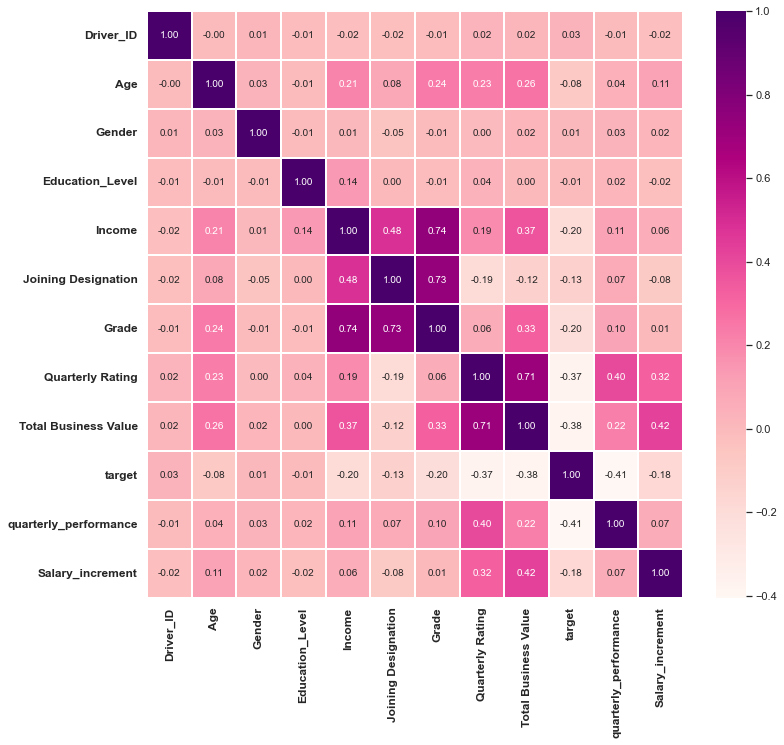

In [60]:
#Checking correlation among independent variables and how they interact with each other.

fig, ax = plt.subplots(figsize=(12, 10))
fig.subplots_adjust(top=.94)

ax.set_yticklabels(ax.get_yticklabels(), ha="right", fontsize=12, weight='bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, weight='bold')

sns.heatmap(company_data_final.corr(), annot = True, fmt='.2f', linewidths=.3, ax = ax ,cmap='RdPu')
plt.show()

### Inference:

- Quarterly Rating is higly corelated with Total Business Value (0.74)
- Joining Designation is higly corelated with Grade (0.73)
- Income is higly corelated with Grade (0.74)
- Joining Designation is moderately corelated with Income (0.48)
- quarterly_performance is very weakly correlated with target (-0.41)
- Total Business Value is very weakly correlated with target (-0.40)



In [61]:
company_data_final

,MMM-YY,Driver_ID,Age,City,Gender,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Quarterly Rating,Total Business Value,target,quarterly_performance,Salary_increment
0,2019-01-01,1,28.0,C23,0.0,2,57387,2018-12-24,2019-03-11,1,1,2.000000,1715580,1,0,0
1,2020-11-01,2,31.0,C7,0.0,2,67016,2020-11-06,NaT,2,2,1.000000,0,0,0,0
2,2019-12-01,4,43.0,C13,0.0,2,65603,2019-12-07,2020-04-27,2,2,1.000000,350000,1,0,0
3,2019-01-01,5,29.0,C9,0.0,0,46368,2019-01-09,2019-03-07,1,1,1.000000,120360,1,0,0
4,2020-08-01,6,31.0,C11,1.0,1,78728,2020-07-31,NaT,3,3,1.600000,1265000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2019-01-01,2784,34.0,C24,0.0,0,82815,2015-10-15,NaT,2,3,2.625000,21748820,0,1,0
2377,2020-08-01,2785,34.0,C9,1.0,0,12105,2020-08-28,2020-10-28,1,1,1.000000,0,1,0,0
2378,2019-01-01,2786,45.0,C19,0.0,0,35370,2018-07-31,2019-09-22,2,2,1.666667,2815090,1,0,0
2379,2019-01-01,2787,28.0,C20,1.0,2,69498,2018-07-21,2019-06-20,1,1,1.500000,977830,1,0,0


In [62]:
def numerical_feat(df,colname,nrows=2,mcols=2,width=15,height=15):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))
    fig.set_facecolor("lightgrey")
    rows = 0
    for var in colname:        
        ax[rows][0].set_title("Boxplot for Outlier Detection ", fontweight="bold")
        plt.ylabel(var, fontsize=12)
        sns.boxplot(y = df[var],color='crimson',ax=ax[rows][0])
        
        # plt.subplot(nrows,mcols,pltcounter+1)
        sns.distplot(df[var],color='purple',ax=ax[rows][1])
        ax[rows][1].axvline(df[var].mean(), color='r', linestyle='--', label="Mean")
        ax[rows][1].axvline(df[var].median(), color='m', linestyle='-', label="Median")
        ax[rows][1].axvline(df[var].mode()[0], color='royalblue', linestyle='-', label="Mode")
        ax[rows][1].set_title("Outlier Detection ", fontweight="bold")
        ax[rows][1].legend({'Mean':df[var].mean(),'Median':df[var].median(),'Mode':df[var].mode()})
        rows += 1
    plt.show()

In [63]:
numerical_cols = ['Total Business Value', 'Income', 'Age']

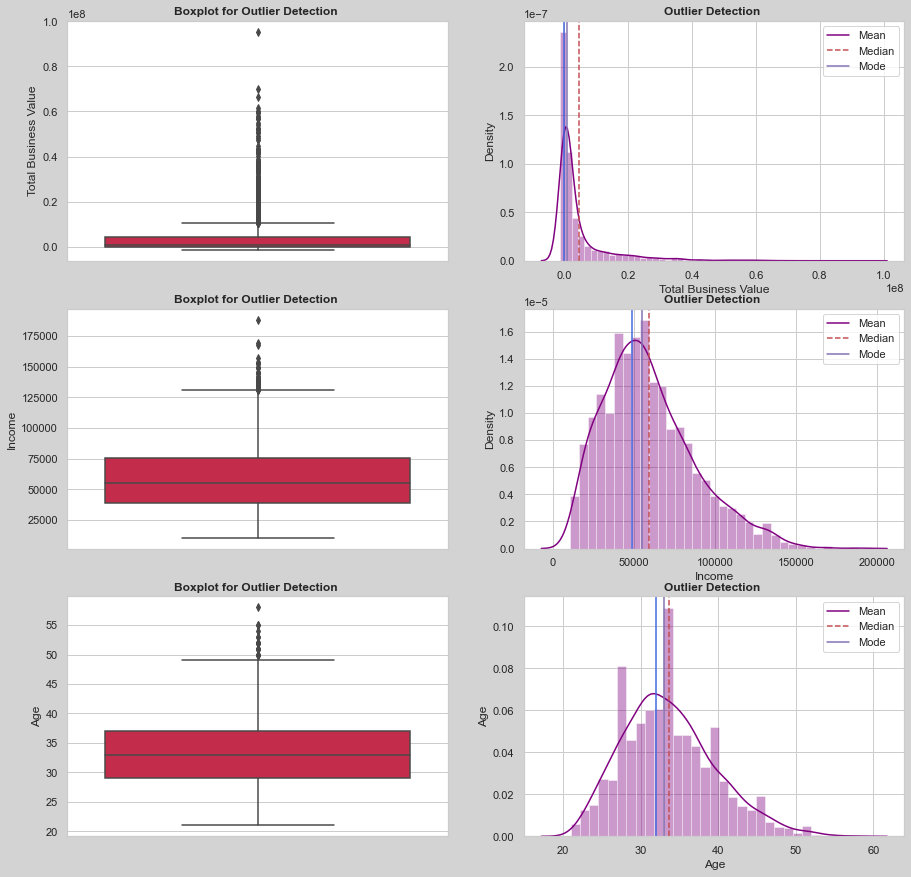

In [64]:
numerical_feat(company_data_final,numerical_cols,len(numerical_cols),2,15,15)

### Inference:

- We can see a lot of outliers in Total Business Value.
- This distribution is left skewed, which tells that a minority chunk of employees contributes to vast business value aquired by employees.
- However, Salary and Age are more or less normally distributed with minimum outliers.

In [65]:
# Frequency of each feature in percentage.
def categorical_feat(df, colnames, nrows=2,mcols=2,width=15,height=70, sortbyindex=False):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))  
    fig.set_facecolor(color = 'lightgrey')
    string = "Frequency of "
    rows = 0                          
    for colname in colnames:
        count = (df[colname].value_counts(normalize=True)*100)
        string += colname + ' in (%)'
        if sortbyindex:
                count = count.sort_index()
        count.plot.bar(color=sns.color_palette("flare"),ax=ax[rows][0])
        ax[rows][0].tick_params(axis='x', rotation=30)
        ax[rows][0].set_ylabel(string, fontsize=14)
        ax[rows][0].set_xlabel(colname, fontsize=14)
        
        count.plot.pie(colors = sns.color_palette("flare"),autopct='%0.0f%%',
                       textprops={'fontsize': 14},shadow = True, ax=ax[rows][1])#explode=[0.2 if colname[i] == min(colname) else 0])        
        ax[rows][0].set_title("Frequency wise " + colname, fontweight="bold")
        string = "Frequency of "
        rows += 1 

In [66]:
categorical_cols = ['Education_Level', 'Joining Designation', 'Grade', 'target', 'quarterly_performance','Salary_increment','Age Groups','Gender','Salary Groups','City']

In [67]:
for i in categorical_cols:
    print(f" Unique values in {i} are {company_data_2[i].nunique()}")

 Unique values in Education_Level are 3
 Unique values in Joining Designation are 5
 Unique values in Grade are 5
 Unique values in target are 2
 Unique values in quarterly_performance are 2
 Unique values in Salary_increment are 2
 Unique values in Age Groups are 5
 Unique values in Gender are 2
 Unique values in Salary Groups are 5
 Unique values in City are 29


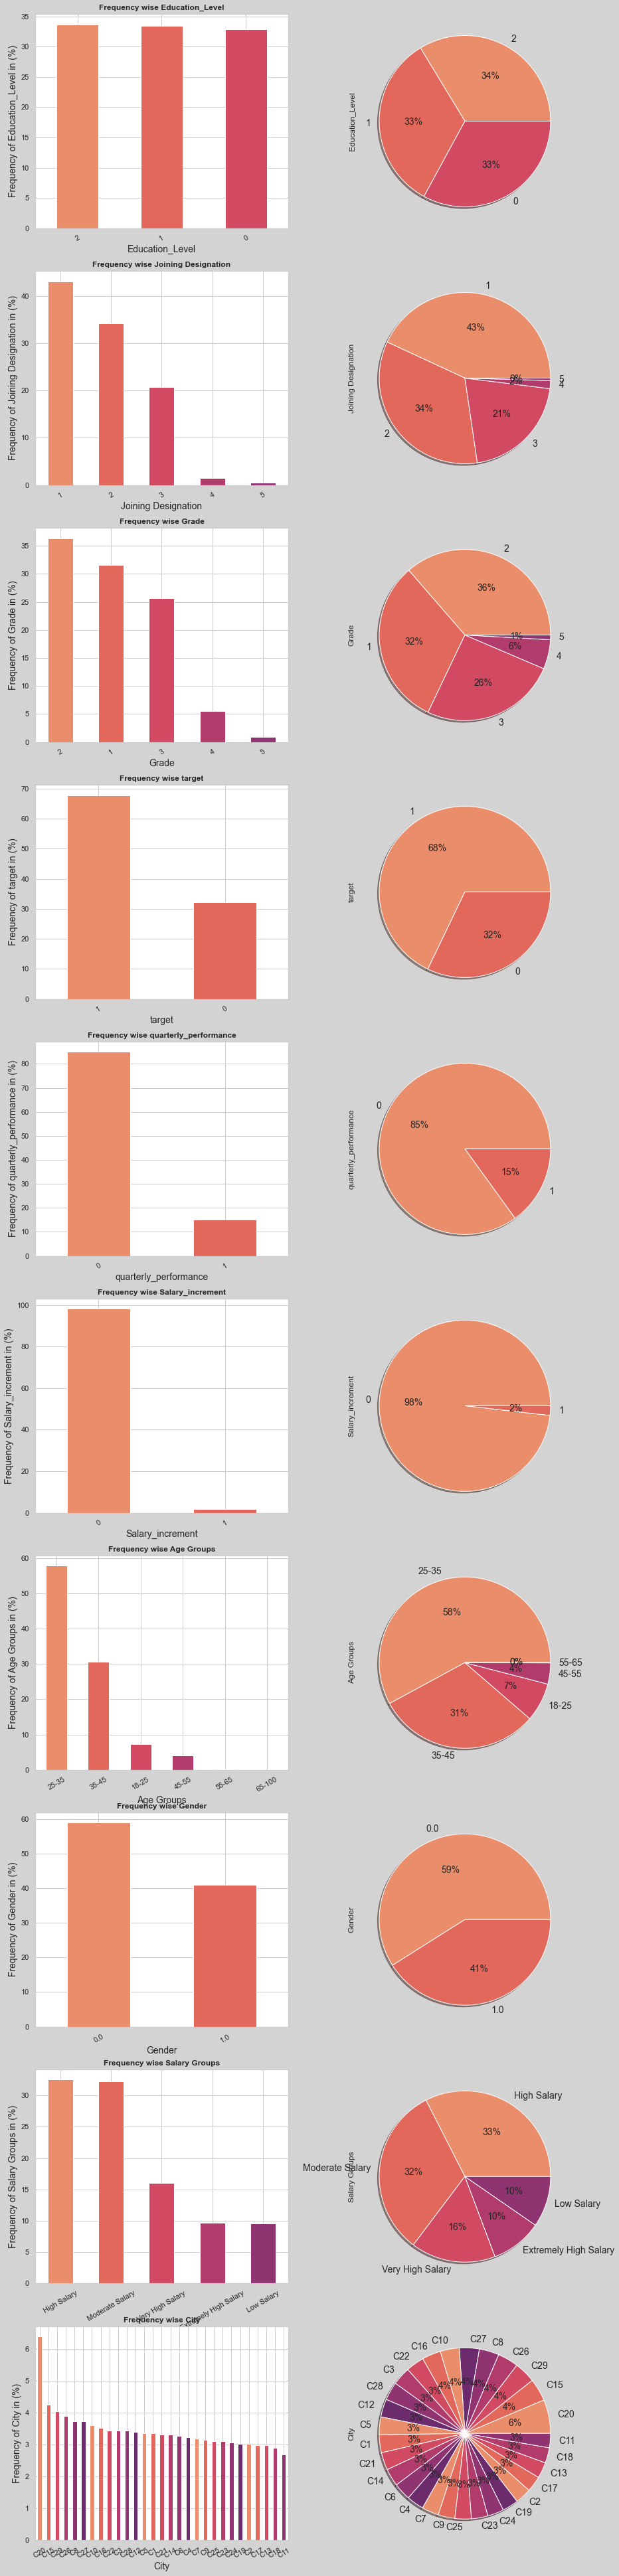

In [68]:
categorical_feat(company_data_2,categorical_cols,len(categorical_cols),2)

### Inference:

- Most of the employees are from 25 to 35 age groups.
- In these two years 2019 and 2020, only 2% of them have got some amount of increment in their Salary.
- City code with C20 has highest no.of employees
- Majority number of employees are from high to moderate Salary groups.
- The female employees are 41% whereas males dominates the population with 59%.
- 15% of employees saw quarterly performance increase in their ratings.
- For 32% of the employees, we have the last working day not present whereas as 68% of them will be leaving the insurance company soon as they have reported their last working day.
- Grade and joining desination shows similar behaiviour.
- The education level is in same ratio for Primary school passouts, secondary school passouts and graduates.


### Datetime feature creation for model training:
- Dropping the rows for datetime object and converting them to ordered year, month and day of the week to fetch some meaningful numerical input for model training.

In [69]:
#1
company_data_final['reporting_year'] = company_data_final['MMM-YY'].dt.year
#2
company_data_final['reporting_month'] = company_data_final['MMM-YY'].dt.month
#3
company_data_final['reporting_day_of_week'] = company_data_final['MMM-YY'].dt.day_of_week
#1
company_data_final['joining_year'] = company_data_final['Dateofjoining'].dt.year
#2
company_data_final['joining_month'] = company_data_final['Dateofjoining'].dt.month
#3
company_data_final['joining_day_of_week'] = company_data_final['Dateofjoining'].dt.day_of_week

In [70]:
company_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   MMM-YY                 2381 non-null   datetime64[ns]
 1   Driver_ID              2381 non-null   int64         
 2   Age                    2381 non-null   float64       
 3   City                   2381 non-null   object        
 4   Gender                 2381 non-null   float64       
 5   Education_Level        2381 non-null   int64         
 6   Income                 2381 non-null   int64         
 7   Dateofjoining          2381 non-null   datetime64[ns]
 8   LastWorkingDate        1616 non-null   datetime64[ns]
 9   Joining Designation    2381 non-null   int64         
 10  Grade                  2381 non-null   int64         
 11  Quarterly Rating       2381 non-null   float64       
 12  Total Business Value   2381 non-null   int64         
 13  tar

In [71]:
# dropping unwanted features

company_data_final.drop(['Driver_ID','MMM-YY', 'Dateofjoining', 'LastWorkingDate'], axis=1, inplace=True)

In [72]:
# Checking for feature with non-numerical values:

from pandas.api.types import is_numeric_dtype
company_col = list(company_data_final.columns)
for col in company_col:
    if is_numeric_dtype(company_data_final[col])== False:
        print(col)

City


In [73]:
company_data_final['Gender'].value_counts()

0.0    1404
1.0     977
Name: Gender, dtype: int64

In [74]:
company_data_final['Education_Level'].value_counts()

2    802
1    795
0    784
Name: Education_Level, dtype: int64

In [75]:
company_data_final

,Age,City,Gender,Education_Level,Income,Joining Designation,Grade,Quarterly Rating,Total Business Value,target,quarterly_performance,Salary_increment,reporting_year,reporting_month,reporting_day_of_week,joining_year,joining_month,joining_day_of_week
0,28.0,C23,0.0,2,57387,1,1,2.000000,1715580,1,0,0,2019,1,1,2018,12,0
1,31.0,C7,0.0,2,67016,2,2,1.000000,0,0,0,0,2020,11,6,2020,11,4
2,43.0,C13,0.0,2,65603,2,2,1.000000,350000,1,0,0,2019,12,6,2019,12,5
3,29.0,C9,0.0,0,46368,1,1,1.000000,120360,1,0,0,2019,1,1,2019,1,2
4,31.0,C11,1.0,1,78728,3,3,1.600000,1265000,0,1,0,2020,8,5,2020,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,34.0,C24,0.0,0,82815,2,3,2.625000,21748820,0,1,0,2019,1,1,2015,10,3
2377,34.0,C9,1.0,0,12105,1,1,1.000000,0,1,0,0,2020,8,5,2020,8,4
2378,45.0,C19,0.0,0,35370,2,2,1.666667,2815090,1,0,0,2019,1,1,2018,7,1
2379,28.0,C20,1.0,2,69498,1,1,1.500000,977830,1,0,0,2019,1,1,2018,7,5


In [76]:
# target -> 1:known LWD 0: Unknown LWD

company_data_final["target"].value_counts(normalize = True)

1    0.678706
0    0.321294
Name: target, dtype: float64

In [77]:
# Assigning the featurs as X and target as y
# target -> 1:known LWD 0: Unknown LWD

X= company_data_final.drop(["target"],axis =1)
y= company_data_final["target"]

### Splitting data into train , validation and test

In [78]:
# Train, CV, test split
from sklearn.model_selection import train_test_split
#0.6, 0.2, 0.2 split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.2, random_state=42)

In [79]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_CV dataset: ", X_val.shape)
print("Number transactions y_CV dataset: ", y_val.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1523, 17)
Number transactions y_train dataset:  (1523,)
Number transactions X_CV dataset:  (381, 17)
Number transactions y_CV dataset:  (381,)
Number transactions X_test dataset:  (477, 17)
Number transactions y_test dataset:  (477,)


### Target encoding - City

- We will do target encoding for City and will use the encoder object to fit_transform which fits the encoders on train set and then transforms as well. 
- However it transforms only the encoders learnt from train set onto test and val sets.


In [80]:
#Converting city from category to numerical via target encoding for Train data:

from category_encoders import TargetEncoder
encoder = TargetEncoder()
X_train['City'] = encoder.fit_transform(X_train['City'], y_train)

In [81]:
#Converting city from category to numerical via target encoding for cv data:

X_val['City'] = encoder.transform(X_val['City'], y_val)

In [82]:
#Converting city from category to numerical via target encoding for test data:

X_test['City'] = encoder.transform(X_test['City'], y_test)

In [83]:
X_train

,Age,City,Gender,Education_Level,Income,Joining Designation,Grade,Quarterly Rating,Total Business Value,quarterly_performance,Salary_increment,reporting_year,reporting_month,reporting_day_of_week,joining_year,joining_month,joining_day_of_week
160,34.0,0.671875,0.0,1,20922,2,2,1.000000,151600,0,0,2019,11,4,2019,11,5
1643,37.0,0.491803,0.0,1,67317,1,2,1.000000,1061950,0,0,2019,1,1,2016,11,0
1159,43.0,0.642857,1.0,1,87325,3,3,1.000000,566440,0,0,2020,4,2,2020,4,5
499,30.0,0.611111,1.0,2,70570,1,2,1.428571,1583300,0,0,2019,1,1,2017,6,4
1214,33.0,0.680851,1.0,1,70900,1,1,1.500000,1741830,0,0,2019,1,1,2018,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,34.0,0.632653,0.0,0,82815,2,3,2.625000,21748820,1,0,2019,1,1,2015,10,3
652,37.0,0.671875,1.0,1,18285,1,1,1.000000,386590,0,0,2019,1,1,2018,11,4
1943,27.0,0.500000,1.0,2,83632,2,2,2.000000,371110,0,0,2020,11,6,2020,11,5
1066,38.0,0.693878,1.0,1,130277,3,3,1.000000,988020,0,0,2019,7,0,2019,7,3


## Model 1 - Random Forest:

- We will use one of ensemble algorithm called bagging.
- We will use the Random Forest model which uses Bagging, where decision tree models with higher variance are present.
- Using f1_score as the data is imbalanced
- Hyper-parameter tuning with max_depth , class_weight, max_samples, num of learners.

In [84]:
# Hyper-pram tuning + DT model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

train_scores = []
val_scores = []

l=1
u=20
d=1
w=2.32
num_learners=100
row_sampling_rate = 0.75


for depth in np.arange(l,u,d):
    clf = RandomForestClassifier(max_depth=depth, max_samples=row_sampling_rate,\
                                 n_estimators=num_learners, random_state=42, oob_score=True, class_weight={ 0:0.68, 1:w } )
    clf.fit(X_train, y_train)
    train_y_pred = clf.predict(X_train)
    val_y_pred = clf.predict(X_val)
    train_score = f1_score(y_train, train_y_pred)
    val_score = f1_score(y_val, val_y_pred)
    train_scores.append(train_score)
    val_scores.append(val_score)

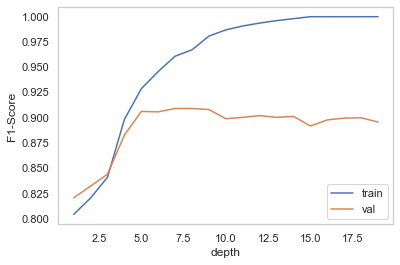

In [85]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(list(np.arange(l,u,d)), train_scores, label="train")
plt.plot(list(np.arange(l,u,d)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("depth")
plt.ylabel("F1-Score")
plt.grid()
plt.show()

In [86]:
# Model with depth_best
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve

best_idx = np.argmax(val_scores)
l_best = l+d*best_idx
print(f"l_best:{l_best}")
clf = RandomForestClassifier(max_depth=l_best, max_samples = row_sampling_rate,\
                             n_estimators=num_learners, random_state=42, class_weight={ 0:0.68, 1:w } )
clf.fit(X_train, y_train)

y_pred_val = clf.predict(X_val)
val_score = f1_score(y_val, y_pred_val)

print(f"val_score:{val_score}")

confusion_matrix(y_val, y_pred_val)

l_best:7
val_score:0.9087591240875912


array([[ 82,  34],
       [ 16, 249]], dtype=int64)

In [87]:
#Testing on test data

test_score = clf.score(X_test, y_test) # Bydefault -> accuracy score
print(test_score)

y_pred = clf.predict(X_test)

0.8721174004192872


In [88]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

print(f"Accuracy : {accuracy_score(y_test, y_pred)*100}%")
print(f"recall_score : {recall_score(y_test, y_pred)*100}%")
print(f"precision_score : {precision_score(y_test, y_pred)*100}%")
print(f"f1_score : {f1_score(y_test, y_pred)*100}%")
print(f"confusion_matrix :")
print(confusion_matrix(y_test, y_pred))

Accuracy : 87.21174004192872%
recall_score : 94.4954128440367%
precision_score : 87.7840909090909%
f1_score : 91.01620029455081%
confusion_matrix :
[[107  43]
 [ 18 309]]


In [89]:
# Predicted        Not leaving the transportation company   leaving the transportation company
# Actual
# Not leaving the transportation company  95  -TN           55   -FP
# leaving the transportation company      7   -FN           320  -TP

confusion = confusion_matrix(y_test, y_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Calculate the sensitivity

print(f"sensitivity: {np.round((TP/(TP+FN)),2)}")
# Calculate the specificity

print(f"specificity: {np.round((TN/(TN+FP)),2)}")

from sklearn.metrics import classification_report

print(f"{classification_report(y_test, y_pred, target_names=['Not leaving the transportation company','leaving the transportation company'])}")

sensitivity: 0.94
specificity: 0.71
                                        precision    recall  f1-score   support

Not leaving the transportation company       0.86      0.71      0.78       150
    leaving the transportation company       0.88      0.94      0.91       327

                              accuracy                           0.87       477
                             macro avg       0.87      0.83      0.84       477
                          weighted avg       0.87      0.87      0.87       477



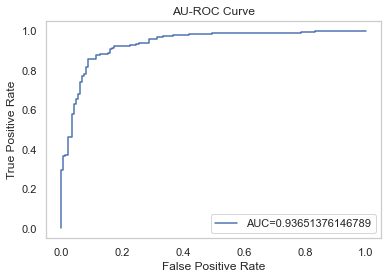

AUC SCORE :0.93651376146789


In [90]:
# AUC- ROC

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.grid()
plt.title("AU-ROC Curve")
plt.show()
print(f"AUC SCORE :{auc}" )

In [91]:
X_train.columns

Index(['Age', 'City', 'Gender', 'Education_Level', 'Income',
       'Joining Designation', 'Grade', 'Quarterly Rating',
       'Total Business Value', 'quarterly_performance', 'Salary_increment',
       'reporting_year', 'reporting_month', 'reporting_day_of_week',
       'joining_year', 'joining_month', 'joining_day_of_week'],
      dtype='object')

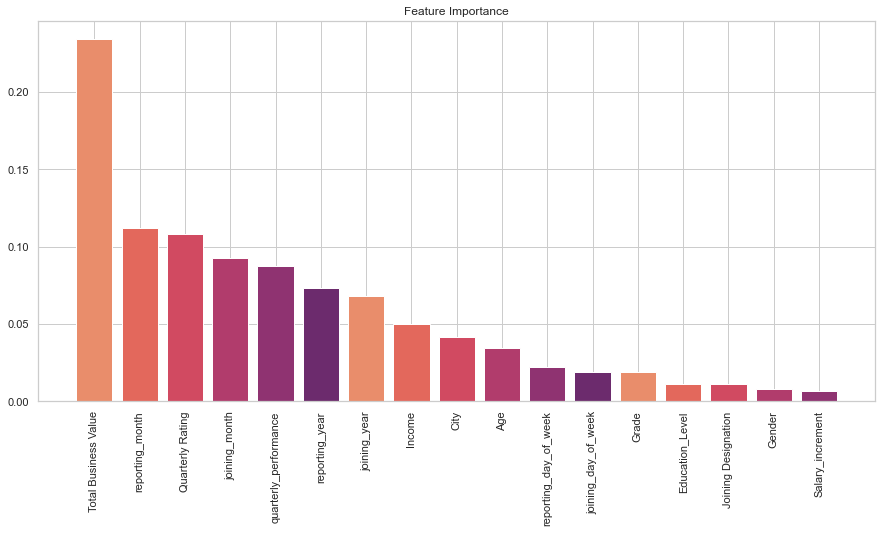

In [92]:
# Feature importance

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_test.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_test.shape[1]), importances[indices],color=sns.color_palette("flare")) # Add bars
plt.xticks(range(X_test.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show()

### Inferences for Model 1:

- The max_depth=7, max_leaf_nodes=20 .Even on more depth it's giving same performace and hence we will prefer most optimal hyperparams
- The f1 score for predicting leaving the insurance company is 0.91
- The recall score for predicting leaving the insurance company is 0.98
- The precision score for predicting leaving the insurance company is 0.88
- The AUC score for predicting leaving the insurance company is 0.93
- The most important features according to model 1 are :
    - Total BusinessValue,quarterly_performance,reporting_month,QuarterlyRating,joining_year,reporting_year.
    - All the other features can be neglected completly.
- Here using Bagging we tried to solve over-fitting problem while we will use Boosting in next model which will be used to reduce bias.

## Model 2 - XgBoost:

- We will now proceed with one of an ensemble learning algorithm called boosting.
- We will use Boosting technique called XgBoost model which implements machine learning algorithms under the Gradient Boosting framework.
- Using f1_score as the data is imbalanced.
- Using n_jobs as 4 emaning no. of jobs running parallely on 4 cores.
- Hyper-parameter tuning with max_depth , learning_rate, subsample, colsample_bytree , n_estimators, and n_iter
- Using StratifiedKFold and RandomizedSearchCV

In [93]:
# Xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold

import datetime as dt

params = {
        'learning_rate': [0.1, 0.5, 0.8],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
xgb = XGBClassifier( n_estimators=100, objective='multi:softmax', num_class=20, silent=True)

In [94]:
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_class=20, num_parallel_tree=None, objective='multi:softmax',
              predictor=None, random_state=None, ...)

In [95]:
folds = 3

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

skf

StratifiedKFold(n_splits=3, random_state=1001, shuffle=True)

In [96]:
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=10, scoring='f1',\
                                   n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )


random_search

RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x00000220FFA25890>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interacti...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_class=20, num_parallel_tree=None,
                                           objective='multi:softmax',
                                           predictor=None, random_state=None, ...),
                   n_jobs=4,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.1, 0.5, 0.8],
                                        'max_depth': [3, 4, 5],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=1001, scoring='f1', verbose=3)

In [97]:
start = dt.datetime.now()
start

datetime.datetime(2022, 9, 28, 14, 28, 0, 281056)

In [98]:
random_search.fit(X_train, y_train)
end = dt.datetime.now()

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[14:28:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [99]:

end

datetime.datetime(2022, 9, 28, 14, 28, 12, 631977)

In [100]:
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best hyperparameters:
{'subsample': 1.0, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}


In [101]:
best_xgb = XGBClassifier(n_estimators=100, objective='multi:softmax', num_class=20,\
                         subsample=0.7, max_depth=3, learning_rate=0.1, colsample_bytree=1.0, silent=True)
best_xgb.fit(X_train, y_train)

[14:28:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_class=20, num_parallel_tree=1,
              objective='multi:softmax', predictor='auto', random_state=0, ...)

In [102]:
print(f"Time taken for training :\
{end - start}\nTraining accuracy:{best_xgb.score(X_train, y_train)}\nTest Accuracy: {best_xgb.score(X_test, y_test)}")

Time taken for training :0:00:12.350921
Training accuracy:0.9560078791858174
Test Accuracy: 0.8972746331236897


In [103]:
#Testing on test data

test_score = best_xgb.score(X_test, y_test) # Bydefault -> accuracy score
print(test_score)

y_pred = best_xgb.predict(X_test)

0.8972746331236897


In [104]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

print(f"Accuracy : {accuracy_score(y_test, y_pred)*100}%")
print(f"recall_score : {recall_score(y_test, y_pred)*100}%")
print(f"precision_score : {precision_score(y_test, y_pred)*100}%")
print(f"f1_score : {f1_score(y_test, y_pred)*100}%")
print(f"confusion_matrix :")
print(confusion_matrix(y_test, y_pred))

Accuracy : 89.72746331236897%
recall_score : 93.27217125382263%
precision_score : 91.86746987951807%
f1_score : 92.56449165402124%
confusion_matrix :
[[123  27]
 [ 22 305]]


In [105]:
# Predicted        Not leaving the transportation company   leaving the transportation company
# Actual
# Not leaving the transportation company  95  -TN           55   -FP
# leaving the transportation company      7   -FN           320  -TP

confusion = confusion_matrix(y_test, y_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Calculate the sensitivity

print(f"sensitivity: {np.round((TP/(TP+FN)),2)}")
# Calculate the specificity

print(f"specificity: {np.round((TN/(TN+FP)),2)}")

from sklearn.metrics import classification_report

print(f"{classification_report(y_test, y_pred, target_names=['Not leaving the transportation company','leaving the transportation company'])}")

sensitivity: 0.93
specificity: 0.82
                                        precision    recall  f1-score   support

Not leaving the transportation company       0.85      0.82      0.83       150
    leaving the transportation company       0.92      0.93      0.93       327

                              accuracy                           0.90       477
                             macro avg       0.88      0.88      0.88       477
                          weighted avg       0.90      0.90      0.90       477



### AUC - ROC using softprob:
- Using objective='multi:softprob' instead of objective='multi:softmax'

In [106]:
best_xgb_softprob = XGBClassifier(n_estimators=100, objective='multi:softprob', num_class=20,\
                         subsample=0.7, max_depth=3, learning_rate=0.1, colsample_bytree=1.0, silent=True)
best_xgb_softprob.fit(X_train, y_train)

[14:28:13] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_class=20, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0, ...)

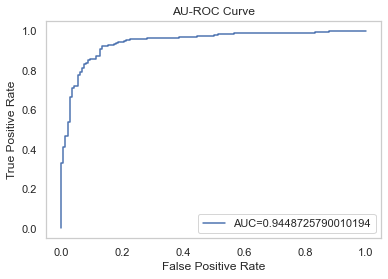

AUC SCORE :0.9448725790010194


In [107]:
# AUC- ROC

y_pred_proba = best_xgb_softprob.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.grid()
plt.title("AU-ROC Curve")
plt.show()
print(f"AUC SCORE :{auc}" )

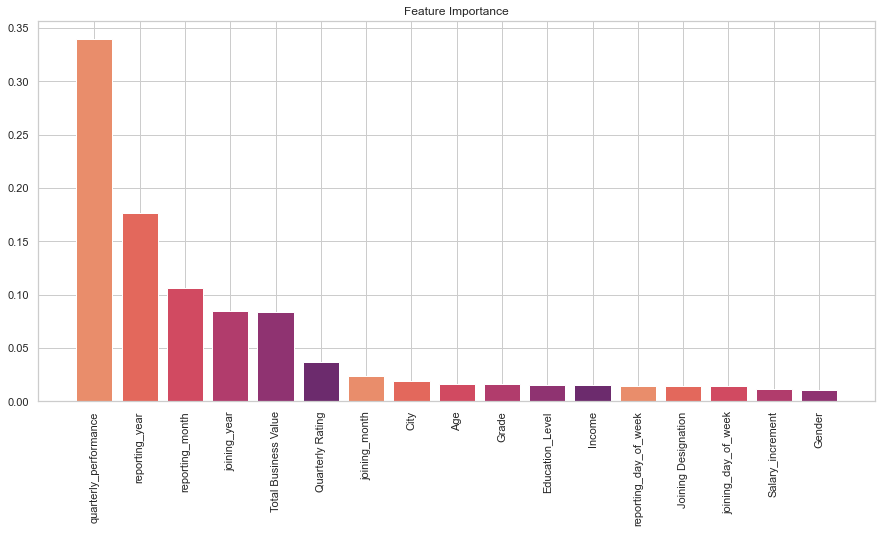

In [108]:
# Feature importance

importances = best_xgb.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_test.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_test.shape[1]), importances[indices],color=sns.color_palette("flare")) # Add bars
plt.xticks(range(X_test.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show()

### Inference from Model 2:

- The best hyperparameters combinations are : 'subsample': 0.7, 'max_depth': 3, 'learning_rate': 0.1,'colsample_bytree': 1.0 .
- The f1 score for predicting leaving the company is 0.93
- The recall score for predicting leaving the company is 0.93
- The precision score for predicting leaving the company is 0.92
- The AUC score for predicting leaving the company is 0.94
- The most important features according to model 2 are :
    - quarterly_performance,reporting_year,reporting_month,joining_year,Total BusinessValue
    - All the other features can be neglected completly.
- As compared to previous model, we are getting best scores.

## Actionable Insights & Recommendations:

- The model performance comparisons are as follows :

    - Model 2 ( XgBoost ) > Model 1 (Random Forest).

- Total BusinessValue is one of the most important feature in predicting if a employee is going to leave the company or not.
- As the total business value acquired by the employee is helping the company in generating revenue and is highly correlated with the quarterly_performance (quarterly rating) which is also an important feature.
- Hence, the company should focus on such top performers and should give some kind of felicitation/awards to keep the morale high of employees. 
- Also for those, whose ratings are not good, the company should conduct bi-monthly meets (online/offline) to educate employees about ethical lessons so that the customers wouldn't give them bad ratings as negative business indicates in cancellation/refund which is hampering the company in long run.


- reporting_year , joining_year, and reporting_month also are important features in churning predictions as it can tell very clearly in how much time in general, a employee is leaving the company. 
- Also, if the employees are not regular in reporting their status , it's clear indication that they are not interested in staying. 
- The company after identifying such employees should ask them about the such irregularities and focus on undersatnding their problems and should resolve their queries as much as possible.

**Feature Salary_increment -** 
- As it's eveident from the EDA, In these two years 2019 and 2020, only 2% of the employees have got some amount of increment in their income . which means, the employees are not satisfied with their progress or they are not getting the expected outcome. 

- Hence they are looking out for some other options (another company). 
- So the company should focus on covering the employees basic necessities such as insurance policies, health checkups, permanent emplyoment status, etc which will avoid the employees in recognising themselves as part of finacially unreliable gig economy. - - It will also loosen some financial burden which inturn would motivate them to stay with the company for long time.